# Handwritten Digit Recognition

This tutorial guides you through a classic computer vision application: identify hand written digits with a multi-layer neural network.

## Tools

* Keras 
* Matplot (to graph training history)
* Numpy (for data types and mathematical operations)
* Sckitlearn (for data normalization)


## Step 1: Load data from MNIST
We first load the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, a classic in the machine-learning community, which has been around almost as long as the field itself and has been intensively studied. It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. Each image in this dataset has been resized into 28x28 with grayscale value between 0 and 254.

The following codes load the images and the according labels. The variables x_train and y_train form the training set, the data that the model will learn from. The model will then be tested on the test set (x_test and y_test variables).

In [41]:
import keras
from keras.datasets import mnist
import numpy
(x_train, y_train), (x_test, y_test) = mnist.load_data()

To see the content we plot the first 10 images and print their labels from training set.

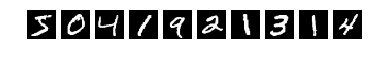

label: [5 0 4 1 9 2 1 3 1 4]


In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap='Greys_r')
    plt.axis('off')
plt.show()
print('label: %s' % (y_train[0:10],))

Show shape (dimensions) of the train and test sets.

In [43]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Step 2: Preprocess input data for neural network

The MNIST training dataset is structured as a 3-dimensional array of instance, image width and image height. For a multi-layer model we must reduce the images down into a vector of pixels by applying reshaping. Apply tensor reshaping means rearrangement of its dimensions to match a target shape (in this case the input shape of the following neural network's input layer is 768 as a result to multiply image width size by image height size).

The following codes transform the train and test datasets with shape of (n_samples, width, height) to (n_samples, width * height).


In [44]:
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28) 

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Reduce our memory requirements by forcing the precision of the pixel values to be 32 bit, the default precision used by Keras anyway.

In [45]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

When using neural network models is a good idea to perform normalization of the values to the range 0 and 1.

In [46]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Step 3: Preprocess class labels for neural network

Show class label's shape of train and test set. 

In [47]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


The number of values per sample isn't clear. Let's show the first 10 training samples. 

In [48]:
print y_train[:10]

[5 0 4 1 9 2 1 3 1 4]


The problem is that there are 1-dimensional class array and the model wait a class matrix, this can be achieved by converting the 1-dimensional class array to 10-dimensional class matrix. We can easily do this using the built-in to_categorical() helper function in Keras (this step is also called one hot encoding).

In [49]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Let's show the first 10 class labels again.

In [50]:
print y_train[:10]

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Now there are an vector of float numbers instead of only one number, indicating the probability of each class in a normalized way (the average of each vector is one).

## Step 4: Define model's arquitecture and layers

Let's start by declaring a sequencial model, which is the most common network architecture by far.

In [51]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

Now declare the input layer. 

In [52]:
from keras.layers import Dense

model.add(Dense(28*28, input_dim=28*28, activation='relu', kernel_initializer='normal'))

The first parameter correspond to the dimensionality of the output space. <br>
The input shape (second parameter) should be the same of the training input (in this case width * height of each digit image).<br>
The activation is a function that update the weights of the network to optimize the loss values.<br>
The [kernel_initializer supported by Keras](https://keras.io/initializers/) specifies how the weights of are randomized. 
<br><br>
At this point we can add more layers to our model like we're  building legos.

The next codes add the output layer to the model:

In [53]:
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

Note that the final layer has an output size of 10, corresponding to the 10 classes of digits.<br>
The softmax activation function is used on the output layer to turn the outputs into probability-like.<br>
Note that Keras automatically handles the connections between layers.

The resulting model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784), where a rectifier activation function is used for the neuron's weight optimization whose has a output of 10 (number of classes).

![title](nb1-1..jpg)

## Step 5: Compile model

At this point only we need to define the loss function and the optimizer, and then the model will be ready to train.

Compile a model means the declaration of the loss function and the optimizer (SGD, Adam, etc.).

In [54]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Keras has a variety of [loss functions](https://keras.io/objectives/) and out-of-the-box [optimizers](https://keras.io/optimizers/) to choose from.

## Step 6: Fit model on training data

To fit the model, all we have to do is declare the batch size and number of epochs to train for, then pass in our training data.

In [ ]:
history = model.fit(x_train, y_train, 
          batch_size=32, epochs=7, verbose=2)

Epoch 1/7
 - 42s - loss: 0.1913 - acc: 0.9436
Epoch 2/7
 - 40s - loss: 0.0750 - acc: 0.9768
Epoch 3/7
 - 39s - loss: 0.0486 - acc: 0.9844
Epoch 4/7


## Step 7: Evaluate model on test data

We can evaluate our model on the test data.

In [142]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08030026910992456
Test accuracy: 0.9778


## Step 8: Graph training history

Finally we can graph the training history to visualize the performance of convolutional network over each iteration (or for visualize the presence of overfitting).

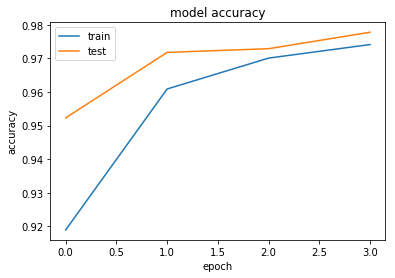

In [144]:
# summarize history for accuracy
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

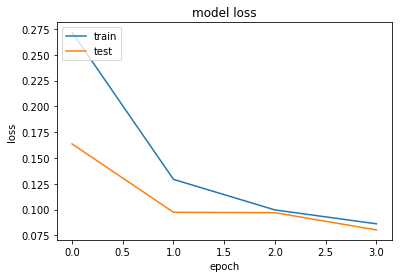

In [145]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We see that the model improved from the second epoch.